#**Crawling Web**

#***library dan tools***

In [ ]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt

hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}


- **rq**  untuk mengambil data dari sebuah website.
- **bs** berfungsi untuk mengurai dan memproses data dari website.
- **Pandas** digunakan untuk menyimpan data dalam format yang mudah dibaca dan diproses.
- **plt** untuk visualisasi

# **Source code**

#### Kategori dan Website target (Web CNBC)

In [ ]:
judul = []
tanggal = []
isi = []
url_list = []
kategori_list = []

base_urls = [
    "https://www.cnbcindonesia.com/research/indeks/127/",
    "https://www.cnbcindonesia.com/news/indeks/3/",
    "https://www.cnbcindonesia.com/tech/indeks/12/",
    "https://www.cnbcindonesia.com/market/indeks/5/"
]
categories = [
    "Research",
    "News",
    "Tech",
    "Market"
]

#### Proses Scraping (Pengambilan Data)

In [ ]:
payload = {'tipe': 'artikel'}
session = rq.Session()  # Menggunakan session untuk efisiensi

for news, category in zip(base_urls, categories):
    for page in range(1, 11):
        url = f"{news}{page}"
        try:
            response = session.get(url, params=payload)
            response.raise_for_status()  # Memunculkan exception jika status code bukan 2xx
            soup = bs(response.content, "html.parser")
            articles = soup.find_all("article")

            for article in articles:
                try:
                    link = article.find("a")["href"]

                    # Jika data tidak ada di halaman daftar, request ke halaman artikel
                    article_response = session.get(link)
                    article_response.raise_for_status()
                    articleFull = bs(article_response.content, "html.parser")

                    judul_element = articleFull.select_one("h1.mb-4.text-32.font-extrabold")
                    judulArtikel = judul_element.text.strip() if judul_element else "Title not found"

                    tanggalArtikel = articleFull.find("div", class_="text-cm text-gray").text.strip()

                    artikel_element = articleFull.find("div", class_="detail-text")
                    artikelTeks = [p.get_text(strip=True) for p in artikel_element.find_all("p")]
                    artikel_content = "\n".join(artikelTeks)

                    judul.append(judulArtikel)
                    tanggal.append(tanggalArtikel)
                    isi.append(artikel_content)
                    url_list.append(link)
                    kategori_list.append(category)

                except (rq.exceptions.RequestException, AttributeError) as e:
                    print(f"Error processing article: {link}, Error: {e}")

        except rq.exceptions.RequestException as e:
            print(f"Error processing page: {url}, Error: {e}")

# Membuat dataframe dan menyimpan ke CSV
df = pd.DataFrame({"judul": judul, "tanggal": tanggal, "isi": isi, "url": url_list, "kategori": kategori_list})
df.to_csv("data-artikel-cnbc.csv", index=False)

Sraping di sini, hanya mengambil data ; Judul, Tanggal postingan, isi Berita, Url, dan Kategori berita.

In [ ]:
df.groupby('kategori').size()

,0
kategori,
Market,100
News,100
Research,100
Tech,100


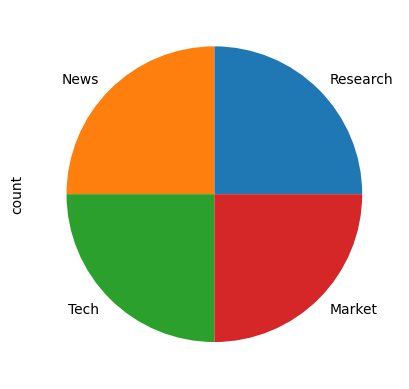

In [ ]:
df["kategori"].value_counts().plot(kind="pie")
plt.show()

**len di gunakan untuk menapilkan hasil sudah lengkap atau tidak.**

In [ ]:
print(len(judul), len(tanggal), len(isi), len(url_list), len(kategori_list))

400 400 400 400 400


In [ ]:
df.head(10)

,judul,tanggal,isi,url,kategori
0,5 Terminal Bus Populer di Jakarta yang Melayan...,19 December 2024 18:40,"Jakarta, CNBC Indonesia- Musim mudik liburan N...",https://www.cnbcindonesia.com/research/2024121...,Research
1,Waspada! ini Titik Rawan Macet di Tol Pulau Ja...,19 December 2024 17:35,"Jakarta, CNBC Indonesia- Arus mudik periode li...",https://www.cnbcindonesia.com/research/2024121...,Research
2,"Termasuk Alfamart, Ini Daftar 5 Raksasa Jaring...",19 December 2024 16:55,"Jakarta,CNBC Indonesia-Indonesia menjadi rumah...",https://www.cnbcindonesia.com/research/2024121...,Research
3,"Amukan Dolar AS Tak Terbendung, Rupiah Bernasi...",19 December 2024 14:30,"Jakarta, CNBC Indonesia -Nilai tukar mata uang...",https://www.cnbcindonesia.com/research/2024121...,Research
4,Ini 6 BPR Syariah Terbaik Penopang Usaha Kecil...,19 December 2024 14:10,"Jakarta, CNBC Indonesia -Bank Pembiayaan Rakya...",https://www.cnbcindonesia.com/research/2024121...,Research
5,Nasib CPO RI di Kala Hujan Tinggi Bawa Petaka ...,19 December 2024 14:05,"Jakarta,CNBC Indonesia-Hujan, yang sering dian...",https://www.cnbcindonesia.com/research/2024121...,Research
6,"Anjlok 1% Lebih, Analis: Waspada IHSG Bisa Tur...",19 December 2024 13:38,"Jakarta, CNBC Indonesia -Indeks Harga Saham Ga...",https://www.cnbcindonesia.com/research/2024121...,Research
7,"Dolar Tembus Rp16.200, Ini Penyebab & Analisa ...",19 December 2024 11:44,"Jakarta, CNBC Indonesia -Nilai tukar rupiah te...",https://www.cnbcindonesia.com/research/2024121...,Research
8,"Perusahaan Aguan Siap IPO, Begini Prospek dan ...",19 December 2024 10:40,"Jakarta, CNBC Indonesia -PT Bangun Kosambi Suk...",https://www.cnbcindonesia.com/research/2024121...,Research
9,"Pemilik Logam Mulia Pegangan yang Erat, Harga ...",19 December 2024 06:20,"Jakarta, CNBC Indonesia -Harga emas dunia di p...",https://www.cnbcindonesia.com/research/2024121...,Research


# Convert data ke dalam csv

jika data sudah Valid, selajutnya proses penyimpanan.


In [ ]:
# Membuat dataframe dari list data
df = pd.DataFrame({"judul": judul, "tanggal": tanggal, "isi": isi, "url": url_list, "kategori": kategori_list})

# Menyimpan dataframe ke file csv
df.to_csv("Hasil_crawling_cnbc.csv", index=False)